In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
!pip install scikit-learn==0.24

In [38]:
!pip install pmdarima

In [39]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Gujarat1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,15,0,0,0,-4,0,0,0,0,0,0,0
131396,2014,12,31,20,0,14,0,0,0,-4,0,0,0,0,0,0,0
131397,2014,12,31,21,0,14,0,0,0,-4,0,0,0,0,0,0,0
131398,2014,12,31,22,0,13,0,0,0,-4,0,0,0,0,0,0,0


In [40]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,17,0,0,0,7,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,17,0,0,0,6,0,0,0,0,0,0,0,2000-01-01 02:00:00
3,2000,1,1,3,0,18,73,343,135,0,76,76,286,286,0,128,128,2000-01-01 03:00:00
4,2000,1,1,4,0,21,122,604,345,-3,114,114,603,603,0,337,337,2000-01-01 04:00:00
5,2000,1,1,5,0,26,149,731,531,-4,140,140,713,713,0,513,513,2000-01-01 05:00:00
6,2000,1,1,6,0,29,164,796,666,-6,154,154,770,770,0,640,640,2000-01-01 06:00:00
7,2000,1,1,7,0,31,171,822,734,-6,153,153,818,818,0,714,714,2000-01-01 07:00:00
8,2000,1,1,8,0,32,170,819,729,-5,184,184,748,748,0,695,695,2000-01-01 08:00:00
9,2000,1,1,9,0,32,162,786,652,-4,147,147,786,786,0,637,637,2000-01-01 09:00:00


In [41]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [42]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2014-12-27,214.8
2014-12-28,217.3
2014-12-29,216.4


In [43]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,229.128571
2000-01-14,235.128571
2000-01-21,244.942857
2000-01-28,256.471429
2000-02-04,253.357143
...,...
2014-12-05,203.471429
2014-12-12,204.757143
2014-12-19,204.271429


In [44]:
y_w[:'2011']

,GHI
Date,
2000-01-07,229.128571
2000-01-14,235.128571
2000-01-21,244.942857
2000-01-28,256.471429
2000-02-04,253.357143
...,...
2011-12-02,188.628571
2011-12-09,206.000000
2011-12-16,208.214286


In [45]:
y[:4382]

,GHI
Date,
2000-01-01,226.1
2000-01-02,227.8
2000-01-03,227.9
2000-01-04,225.9
2000-01-05,228.8
...,...
2011-12-29,218.8
2011-12-30,218.8
2011-12-31,217.8


In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
type(y)

pandas.core.frame.DataFrame

In [48]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [49]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [50]:
type(X_T[:626])

numpy.ndarray

In [51]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=7))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [52]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[216.80382]]
[[234.22357]]
[[246.45708]]
[[236.68063]]
[[248.75943]]
[[270.0162]]
[[287.5556]]
[[300.9266]]
[[303.28568]]
[[311.23764]]
[[326.27704]]
[[333.28656]]
[[336.28635]]
[[340.42715]]
[[340.44858]]
[[297.8489]]
[[352.64557]]
[[342.44382]]
[[334.30035]]
[[345.03513]]
[[347.72354]]
[[341.80743]]
[[327.84222]]
[[282.97678]]
[[305.59222]]
[[286.6288]]
[[272.72202]]
[[267.35416]]
[[274.30624]]
[[264.8958]]
[[222.54169]]
[[285.6464]]
[[261.0517]]
[[223.31789]]
[[262.37115]]
[[181.081]]
[[224.42056]]
[[284.8528]]
[[274.09485]]
[[281.77945]]
[[267.30646]]
[[243.55026]]
[[237.35971]]
[[228.35638]]
[[215.74785]]
[[209.922]]
[[202.84673]]
[[198.03288]]
[[201.17282]]
[[195.87268]]
[[211.52408]]
[[213.37881]]
[[221.83003]]
[[232.11275]]
[[202.70433]]
[[255.822]]
[[260.16336]]
[[270.5035]]
[[281.21002]]
[[301.55582]]
[[312.2574]]
[[324.3485]]
[[328.99182]]
[[330.08246]]
[[332.3904]]
[[326.32864]]
[[335.26923]]
[[303.06705]]
[[337.59695]]
[[352.93048]]
[[355.7184]]
[[358.73975]]
[[356.16068]

[array([[216.80382]], dtype=float32),
 array([[234.22357]], dtype=float32),
 array([[246.45708]], dtype=float32),
 array([[236.68063]], dtype=float32),
 array([[248.75943]], dtype=float32),
 array([[270.0162]], dtype=float32),
 array([[287.5556]], dtype=float32),
 array([[300.9266]], dtype=float32),
 array([[303.28568]], dtype=float32),
 array([[311.23764]], dtype=float32),
 array([[326.27704]], dtype=float32),
 array([[333.28656]], dtype=float32),
 array([[336.28635]], dtype=float32),
 array([[340.42715]], dtype=float32),
 array([[340.44858]], dtype=float32),
 array([[297.8489]], dtype=float32),
 array([[352.64557]], dtype=float32),
 array([[342.44382]], dtype=float32),
 array([[334.30035]], dtype=float32),
 array([[345.03513]], dtype=float32),
 array([[347.72354]], dtype=float32),
 array([[341.80743]], dtype=float32),
 array([[327.84222]], dtype=float32),
 array([[282.97678]], dtype=float32),
 array([[305.59222]], dtype=float32),
 array([[286.6288]], dtype=float32),
 array([[272.7220

In [53]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

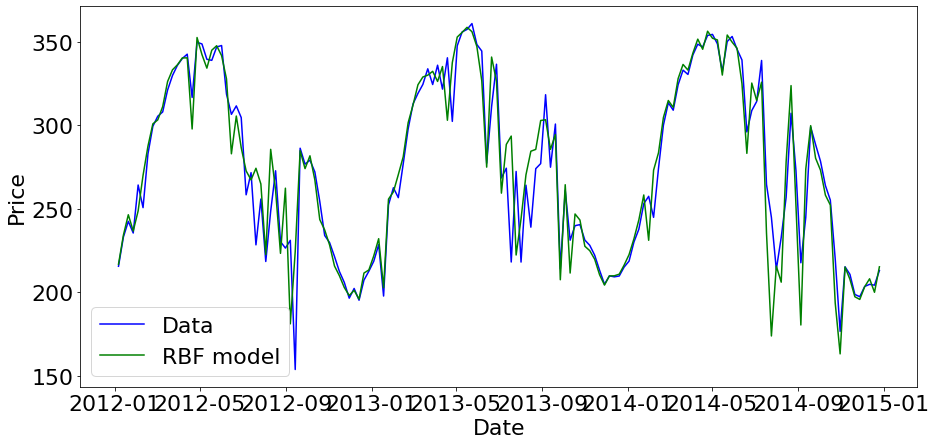

In [54]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))

17.282255715493154


In [56]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))

0.04058079582825057


In [57]:
X_train = y_w[:'2011']
X_test = y_w['2012':]

In [58]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=5915.783, Time=2.52 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=5685.415, Time=6.87 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=35.16 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=5836.373, Time=0.78 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=52.24 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=35.26 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=5751.745, Time=4.81 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=48.49 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=inf, Time=28.95 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=5687.415, Time=22.43 sec

Best model:  ARIMA(1,1,0)(1,1,0)[52]          
Total fit time: 237.546 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  626
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -2839.708
Date:                            Fri, 28 May 2021   AIC                           5685.415
Time:                                    15:03:17   BIC                           5698.468
Sample:                                         0   HQIC                          5690.507
                                            - 626                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3359      0.026    -13.057      0.000      -0.386      -0.285
ar.S.L52      -0.4962      0.026    -18.958      0.000      -0.547      -0.445
sigma2      1150.6439     37.610     30.594      0.000    1076.930    1224.358
===================================================================================
Ljung-Box (L1) (Q):                   6.26   Jarque-Bera (JB):               537.99
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                            -0.33
Prob(H) (two-sided):                  0.86   Kurtosis:                         7.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
stepwise_model.fit(X_train)
pred=stepwise_model.predict(n_periods=156)
pred

array([217.31545014, 225.90673493, 248.78569313, 259.78375009,
       270.18042117, 266.59592323, 274.21186089, 305.53153209,
       303.36567765, 315.67072921, 331.38999094, 338.5344763 ,
       343.75574329, 344.66700918, 343.92634019, 348.64151699,
       354.50374818, 337.66368248, 348.55926752, 349.87234537,
       333.03894421, 335.60249128, 315.79179836, 303.50771192,
       296.57650522, 285.08323873, 248.4964411 , 248.91713449,
       261.60213378, 227.03106184, 226.68722114, 220.22649242,
       263.79770797, 257.70902348, 193.79156147, 209.58059349,
       207.60502676, 279.26615809, 278.27977957, 278.81200453,
       255.12111212, 251.54603088, 236.48087853, 200.25027057,
       189.63648596, 199.80086604, 181.17310506, 198.63426069,
       208.73298297, 207.86381134, 212.34419956, 215.89762988,
       223.17384313, 230.61404185, 248.59117422, 260.66054486,
       270.1302863 , 272.40020958, 265.73927447, 306.20031938,
       304.846866  , 318.40405919, 331.67535123, 338.92

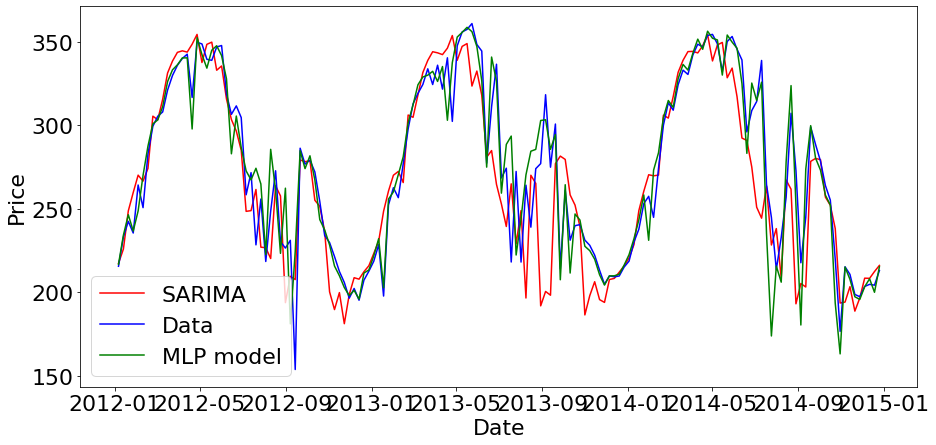

In [60]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, pred, color= 'red', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

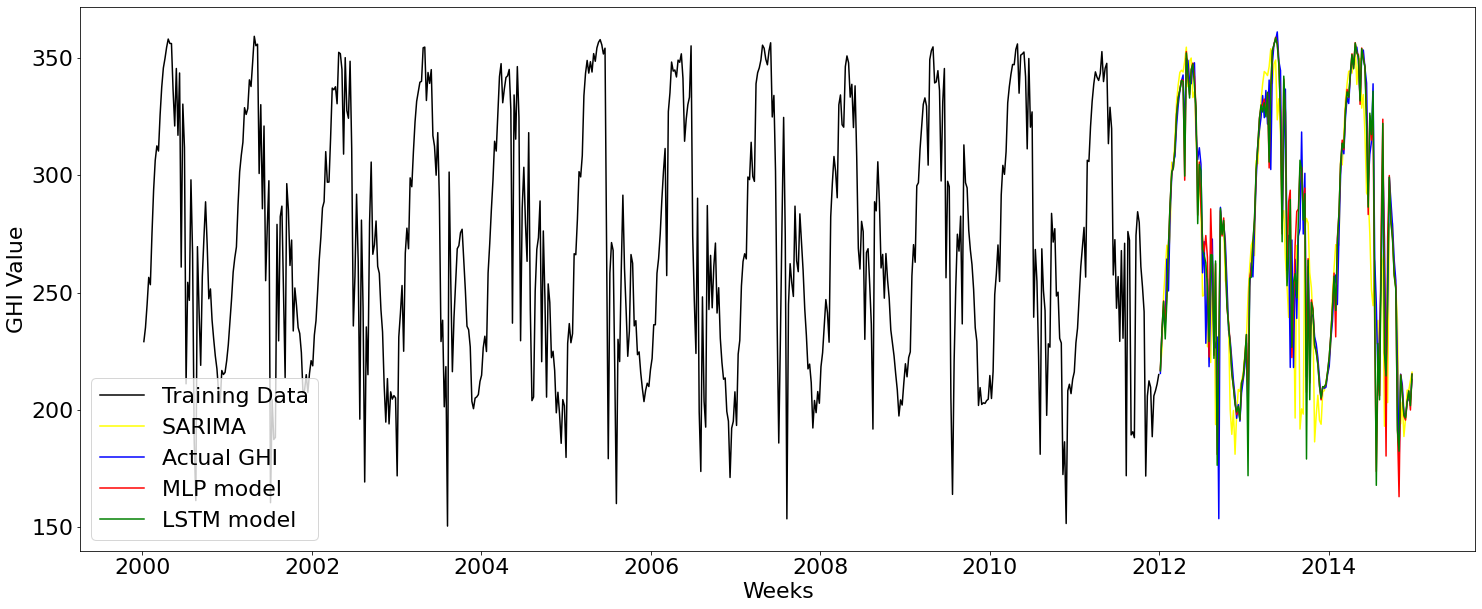

In [61]:
LSTM = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Gujarat1/LSTMweekly.csv')
plt.figure(figsize = (25,10))
plt.rcParams.update({'font.size':22})
plt.plot(y_w[:626].index, y_w[:626], color= 'black', label= 'Training Data')
plt.plot(y_w[626:-1].index, pred, color= 'yellow', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Actual GHI')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'red', label= 'MLP model') 
plt.plot(y_w[626:-1].index, LSTM['GHI'], color= 'green', label= 'LSTM model')
plt.xlabel('Weeks')
plt.ylabel('GHI Value')
plt.legend()
plt.show()

In [ ]:
hybrid=pd.DataFrame(columns=['Values','Model'])
for i in range (156):
  if abs(yhat[i]-y_w.iloc[626+i]['GHI'])<abs(pred[i]-y_w.iloc[626+i]['GHI']):
    hybrid.loc[i]=[yhat[i][0][0],-1]
  else:
    hybrid.loc[i]=[pred[i],1]
hybrid

,Values,Model
0,217.315450,1.0
1,234.558197,-1.0
2,246.676926,-1.0
3,230.587784,-1.0
4,270.180421,1.0
...,...,...
151,196.533324,1.0
152,202.436035,-1.0
153,208.031738,-1.0
154,200.311996,-1.0


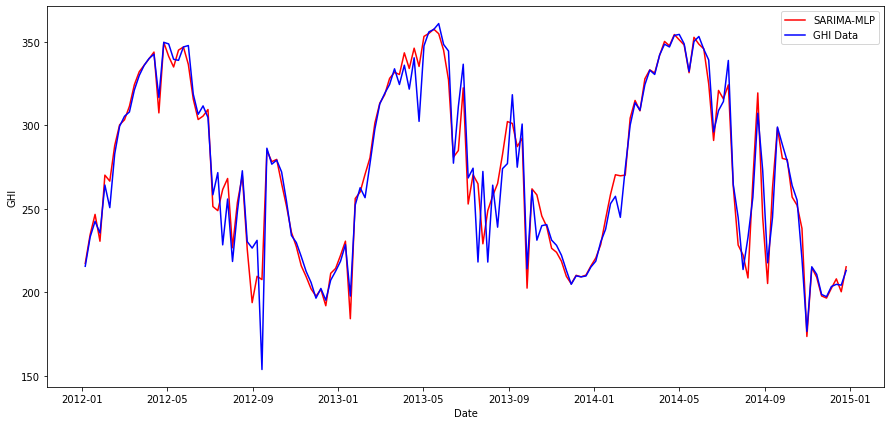

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, hybrid['Values'], color= 'red', label= 'SARIMA-MLP')
#plt.scatter(y_w[626:678].index, hybrid['Model'][:52], color= 'red', label= 'hybrid1',marker='+')
#plt.scatter(y_w[626:678].index, hybrid['Model'][52:104], color= 'blue', label= 'hybrid2',marker='|',s=hybrid['Model'][52:104]*50)
#plt.scatter(y_w[626:678].index, hybrid['Model'][104:156], color= 'green', label= 'hybrid3',marker='_')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'GHI Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))
print(mean_squared_error(y_w[626:-1],pred,squared=False))
print(mean_squared_error(y_w[626:-1],hybrid['Values'],squared=False))

17.6009299329642
27.02355916416943
12.186208443980174


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))
print(mean_absolute_percentage_error(y_w[626:-1],pred))
print(mean_absolute_percentage_error(y_w[626:-1],hybrid['Values']))

0.04008077203936951
0.06847699419133049
0.029919187322004433
